In [1]:
print("14 Akash Choudhary")

# Import necessary libraries
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create individual classifiers
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = SVC(kernel='linear', probability=True, random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=3)

# Create a voting classifier with hard voting
voting_clf = VotingClassifier(estimators=[('dt', clf1), ('svm', clf2), ('knn', clf3)], voting='hard')

# Fit the voting classifier to the training data
voting_clf.fit(X_train, y_train)

14 Akash Choudhary


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])

In [2]:
print("14 Akash Choudhary")

# Predict on the test data
y_pred_voting = voting_clf.predict(X_test)

# Calculate accuracy
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Accuracy using Hard Voting:", accuracy_voting)

14 Akash Choudhary
Accuracy using Hard Voting: 1.0


In [3]:
print("14 Akash Choudhary")

# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot as plt
from numpy import mean, std

# Define a function to generate a classification dataset
def get_dataset():
    """
    Generate a synthetic classification dataset.

    Returns:
    X : array-like, shape (n_samples, n_features)
        The generated input data.
    y : array-like, shape (n_samples,)
        The integer labels for class membership of each sample.
    """
    # Generate the classification dataset
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
    return X, y

# Print dataset shape
print("Dataset Shape:", X.shape, y.shape)

14 Akash Choudhary
Dataset Shape: (150, 4) (150,)


In [4]:
print("14 Akash Choudhary")

# Define functions to create and evaluate hard voting ensemble
def get_voting():
    models = list()
    # Define base models
    for k in [1, 3, 5, 7, 9]:
        models.append(('knn' + str(k), KNeighborsClassifier(n_neighbors=k)))
    # Define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

def get_models():
    models = dict()
    # Define individual models
    for k in [1, 3, 5, 7, 9]:
        models['knn' + str(k)] = KNeighborsClassifier(n_neighbors=k)
    # Add hard voting ensemble
    models['hard_voting'] = get_voting()
    return models

def evaluate_model(model, X, y):
    # Define cross-validation strategy
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Evaluate model using cross-validation
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Define dataset
X, y = get_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

14 Akash Choudhary
>knn1 0.873 (0.030)
>knn3 0.889 (0.038)
>knn5 0.895 (0.031)
>knn7 0.899 (0.035)
>knn9 0.900 (0.033)
>hard_voting 0.902 (0.034)


14 Akash Choudhary


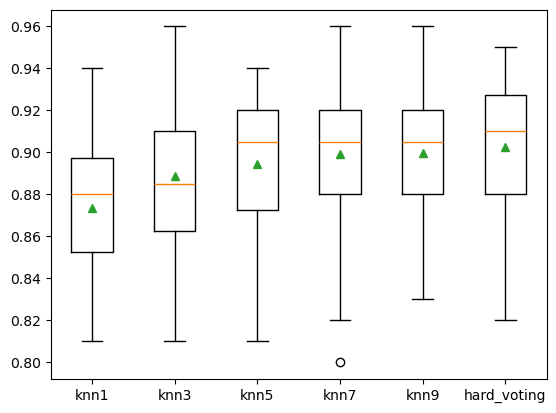

In [5]:
print("14 Akash Choudhary")

# Plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [6]:
print("14 Akash Choudhary")

# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define dataset for prediction
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

# Define the base models for the hard voting ensemble
models = list()
models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))

# Define the hard voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')

# Fit the ensemble model on all available data
ensemble.fit(X, y)

14 Akash Choudhary


VotingClassifier(estimators=[('knn1', KNeighborsClassifier(n_neighbors=1)),
                             ('knn3', KNeighborsClassifier(n_neighbors=3)),
                             ('knn5', KNeighborsClassifier()),
                             ('knn7', KNeighborsClassifier(n_neighbors=7)),
                             ('knn9', KNeighborsClassifier(n_neighbors=9))])

In [7]:
print("14 Akash Choudhary")

# Make a prediction for one example
data = [[5.88891819, 2.64867662, -0.42728226, -1.24988856, -0.00822, -3.57895574, 2.87938412, -1.55614691, -0.38168784, 7.50285659, -1.16710354, -5.02492712, -0.46196105, -0.64539455, -1.71297469, 0.25987852, -0.193401, -5.52022952, 0.0364453, -1.960039]]
yhat = ensemble.predict(data)

# Print the predicted class
print('Predicted Class:', yhat[0])  # Assuming yhat is a 1D array

14 Akash Choudhary
Predicted Class: 1


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


In [8]:
print("14 Akash Choudhary")

# Import necessary libraries
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

# Define a function to create a soft voting ensemble of SVM models
def get_voting():
    """
    Create a soft voting ensemble of SVM models.
    
    Returns:
    ensemble : VotingClassifier
        A soft voting ensemble classifier.
    """
    # Initialize an empty list to store base models
    models = list()
    
    # Add SVM models with different polynomial degrees to the list
    models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
    models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
    models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
    models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
    models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
    
    # Create the soft voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='soft')
    return ensemble

# Define a function to get a dictionary of models to evaluate
def get_models():
    """
    Get a dictionary of models to evaluate, including individual SVM models and a soft voting ensemble.
    
    Returns:
    models : dict
        A dictionary containing SVM models and a soft voting ensemble.
    """
    models = dict()
    models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
    models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
    models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
    models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
    models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
    models['soft_voting'] = get_voting()
    return models

# Define a function to get the classification dataset
def get_dataset():
    """
    Generate a synthetic classification dataset.
    
    Returns:
    X : array-like, shape (n_samples, n_features)
        The generated input data.
    y : array-like, shape (n_samples,)
        The integer labels for class membership of each sample.
    """
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
    return X, y

# Define a function to evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    """
    Evaluate a given model using cross-validation.
    
    Parameters:
    model : object
        The model to be evaluated.
    X : array-like, shape (n_samples, n_features)
        The input data.
    y : array-like, shape (n_samples,)
        The target labels.
        
    Returns:
    scores : array-like, shape (n_splits * n_repeats,)
        The cross-validation scores.
    """
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Get the classification dataset
X, y = get_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

14 Akash Choudhary
>svm1 0.855 (0.035)
>svm2 0.859 (0.034)
>svm3 0.890 (0.035)
>svm4 0.808 (0.037)
>svm5 0.850 (0.037)
>soft_voting 0.923 (0.026)


14 Akash Choudhary


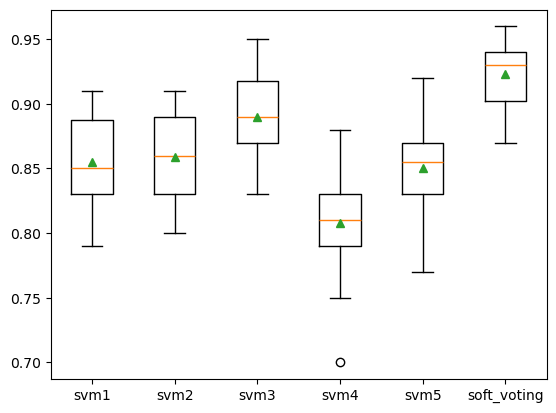

In [9]:
print("14 Akash Choudhary")

# Plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [10]:
print("14 Akash Choudhary")

# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# Define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

# Define the base models
models = list()
models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))

# Define the soft voting ensemble
ensemble = VotingClassifier(estimators=models, voting='soft')

# Fit the model on all available data
ensemble.fit(X, y)

14 Akash Choudhary


VotingClassifier(estimators=[('svm1',
                              SVC(degree=1, kernel='poly', probability=True)),
                             ('svm2',
                              SVC(degree=2, kernel='poly', probability=True)),
                             ('svm3', SVC(kernel='poly', probability=True)),
                             ('svm4',
                              SVC(degree=4, kernel='poly', probability=True)),
                             ('svm5',
                              SVC(degree=5, kernel='poly', probability=True))],
                 voting='soft')

In [11]:
print("14 Akash Choudhary")

# Make a prediction for one example
data = [[5.88891819,2.64867662,-0.42728226,-1.24988856,-0.00822,-3.57895574,2.87938412,-1.55614691,-0.38168784,7.50285659,-1.16710354,-5.02492712,-0.46196105,-0.64539455,-1.71297469,0.25987852,-0.193401,-5.52022952,0.0364453,-1.960039]]
yhat = ensemble.predict(data)
print('Predicted Class: %d' % (yhat[0]))

14 Akash Choudhary
Predicted Class: 1


In [12]:
print("14 Akash Choudhary")

# Import necessary libraries
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold
from matplotlib import pyplot
from numpy import mean, std

# Define function to get the regression dataset
def get_dataset():
    # Generate regression dataset with specified parameters
    X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
    return X, y

# Print dataset shape
print(X.shape, y.shape)

# Define function to create a voting ensemble of models
def get_voting():
    # Define the base models
    models = list()
    models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
    models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
    models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
    models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
    models.append(('cart5', DecisionTreeRegressor(max_depth=5)))
    # Define the voting ensemble
    ensemble = VotingRegressor(estimators=models)
    return ensemble


# Define function to get a list of models to evaluate
def get_models():
    models = dict()
    models['cart1'] = DecisionTreeRegressor(max_depth=1)
    models['cart2'] = DecisionTreeRegressor(max_depth=2)
    models['cart3'] = DecisionTreeRegressor(max_depth=3)
    models['cart4'] = DecisionTreeRegressor(max_depth=4)
    models['cart5'] = DecisionTreeRegressor(max_depth=5)
    models['voting'] = get_voting()
    return models


# Define function to evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# Define dataset
X, y = get_dataset()
# Get the models to evaluate
models = get_models()
# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

14 Akash Choudhary
(1000, 20) (1000,)
>cart1 -161.519 (11.414)
>cart2 -152.596 (11.271)
>cart3 -142.378 (10.900)
>cart4 -140.086 (12.469)
>cart5 -137.495 (12.323)
>voting -136.413 (11.288)


14 Akash Choudhary


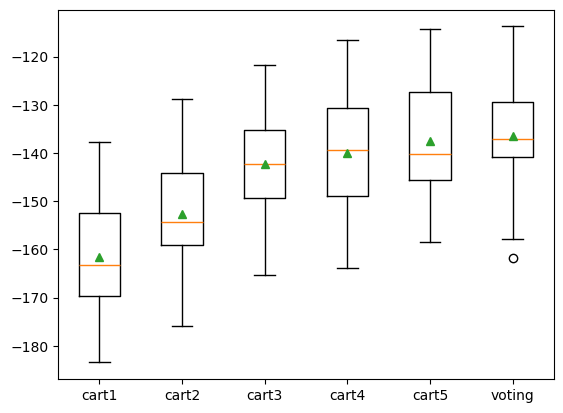

In [13]:
print("14 Akash Choudhary")

# Plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [14]:
print("14 Akash Choudhary")

# Import necessary libraries
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

# Define dataset
# Generate regression dataset with specified parameters
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

# Define the base models
models = list()
models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
models.append(('cart5', DecisionTreeRegressor(max_depth=5)))

# Define the voting ensemble
ensemble = VotingRegressor(estimators=models)

# Fit the model on all available data
ensemble.fit(X, y)

14 Akash Choudhary


VotingRegressor(estimators=[('cart1', DecisionTreeRegressor(max_depth=1)),
                            ('cart2', DecisionTreeRegressor(max_depth=2)),
                            ('cart3', DecisionTreeRegressor(max_depth=3)),
                            ('cart4', DecisionTreeRegressor(max_depth=4)),
                            ('cart5', DecisionTreeRegressor(max_depth=5))])

In [15]:
print("14 Akash Choudhary")

# Make a prediction for one example
# Define an example data point for prediction
data = [[0.59332206,-0.56637507,1.34808718,-0.57054047,-0.72480487,1.05648449,0.77744852,0.07361796,0.88398267,2.02843157,1.01902732,0.11227799,0.94218853,0.26741783,0.91458143,-0.72759572,1.08842814,-0.61450942,-0.69387293,1.69169009]]
# Use the ensemble to predict the target value for the example data point
yhat = ensemble.predict(data)
# Print the predicted value
print('Predicted Value: %.3f' % (yhat[0]))

14 Akash Choudhary
Predicted Value: 141.319
